In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    
import pandas as pd
import glob


# for data analysis 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score


# Model
from sklearn.neighbors import KernelDensity
from sklearn.svm import OneClassSVM
from sklearn.covariance import MinCovDet


from changepy import pelt

# importance
from sklearn.inspection import permutation_importance
import shap

In [2]:
filenames = glob.glob('data/*')
filenames.sort()
filenames

['data/ECG200_ldt.csv',
 'data/mult_saddle_node_bifurcation_lnt.csv',
 'data/saddle_node_bifurcation_lnt.csv',
 'data/toy_ARmodel_change_lnt.csv',
 'data/toy_linear_change_lnt.csv',
 'data/toy_mean_change_lnt.csv',
 'data/toy_std_change_lnt.csv',
 'data/toy_structure_change_lnt.csv']

In [3]:
filename = filenames[5]

df = pd.read_csv(filename,index_col=0)


In [4]:
IDs = list(set(df.id.values))
IDs.sort()
num_data = np.zeros(len(IDs))

x_data = []
y_data = []
for i in range(len(IDs)):
    id_data = IDs[i]
    df_id = df[df.id == id_data]
    num_data[i] = df_id.shape[0]
    x_data.append(df_id.values[:,3:])
    y_data.append(df_id.values[:,2])


# KDE

In [40]:
xc = x_data[-1]
x = x_data[0]

In [41]:
window_size = 10
x_train = np.zeros((0,window_size))
for i in range(100):
    x_tmp = np.lib.stride_tricks.sliding_window_view(x_data[-(i+1)].reshape(-1),10)
    x_train = np.r_[x_train,x_tmp]
x_test = np.lib.stride_tricks.sliding_window_view(x.reshape(-1),10)



In [47]:
kde = KernelDensity()
kde.fit(x_train)
score = - kde.score_samples(x_test)

Text(0,0.5,'Score')

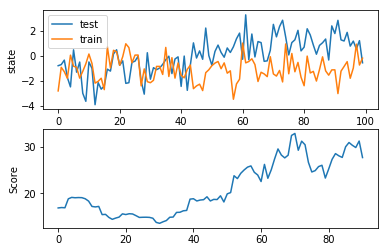

In [51]:
plt.subplot(2,1,1)

plt.plot(x_data[0],label='test')
plt.plot(x_data[-1],label='train')
plt.legend()

plt.ylabel('state')
plt.subplot(2,1,2)
plt.plot(score)
plt.ylabel('Score')


# 分布間距離

In [52]:
import ot

In [87]:
window_size = 20
x_test = np.lib.stride_tricks.sliding_window_view(x_data[0].reshape(-1),10)


score =[]
i = 0 
for i in range(x_test.shape[0]-window_size):
    nu = x_test[i].reshape(-1,1)
    mu = x_test[i+window_size].reshape(-1,1)
    score.append(ot.wasserstein_1d(nu,mu))


Text(0,0.5,'Score')

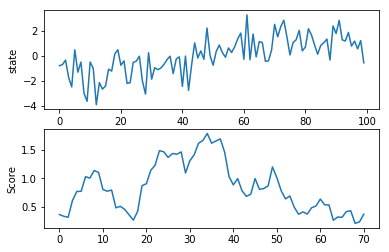

In [88]:
plt.subplot(2,1,1)

plt.plot(x_data[0],label='test')
# plt.legend()

plt.ylabel('state')
plt.subplot(2,1,2)
plt.plot(score)
plt.ylabel('Score')



In [77]:
P.max(axis=1).sum()

1.0

In [81]:
ot.wasserstein_1d(nu,mu)

0.22414430699187526